In [1]:
#Import Modules
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import twitter_samples
from package import build_freqs, process_tweets
import math

print("All Modules Imported")

All Modules Imported


In [2]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [3]:
train_pos = all_positive_tweets[:4000]
train_neg = all_negative_tweets[:4000]
test_pos = all_positive_tweets[4000:]
test_neg = all_negative_tweets[4000:]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

In [4]:
train_y = np.append(np.ones((len(train_pos),1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos),1)), np.zeros((len(test_neg), 1)), axis=0)

In [5]:
print(train_y.shape)
print(test_y.shape)

(8000, 1)
(2000, 1)


In [6]:
freqs = build_freqs(train_x, train_y)

In [7]:
len(freqs.keys())

11428

In [8]:
print(train_x[0])
print(process_tweets(train_x[0]))

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


In [9]:
def extract_features(tweet, freqs):
    word_l = process_tweets(tweet)
    
    x = np.zeros((1, 3))
    
    x[0,0]=1
    for word in word_l:
        x[0,1] += freqs.get((word, 1.0),0)
        x[0,2] += freqs.get((word, 0.0),0)
        
    assert(x.shape == (1, 3))
    return x

In [10]:
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)
Y = train_y.ravel()

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, Y)

LogisticRegression()

In [12]:
X_test = np.zeros((len(test_x), 3))
for i in range(len(test_x)):
    X_test[i, :]= extract_features(test_x[i], freqs)
Y_test = test_y.ravel()

In [13]:
Y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
print("Accuracy Score:", accuracy_score(Y_test, Y_pred)*100)
print("F1 Score:", round(f1_score(Y_test, Y_pred)*100,2))

Accuracy Score: 99.4
F1 Score: 99.4


In [15]:
cnf = confusion_matrix(Y_test, Y_pred)

Plotting Confusion Matrix on Test Data


<AxesSubplot:>

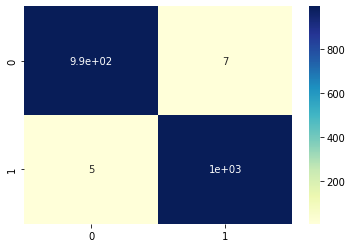

In [16]:
import seaborn as sns
print("Plotting Confusion Matrix on Test Data")
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap='YlGnBu')

In [17]:
tweets =['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']

In [18]:
for tweet in tweets:
    t = extract_features(tweet, freqs)
    print( '%s -> %f' % (tweet, model.predict_proba(t)[0,1]))

I am happy -> 0.844955
I am bad -> 0.533869
this movie should have been great. -> 0.814860
great -> 0.817655
great great -> 0.922418
great great great -> 0.969255
great great great great -> 0.988178


In [19]:
temp = X_test[Y_test!=Y_pred]
temp

array([[  1., 687., 738.],
       [  1., 203., 309.],
       [  1., 203., 309.],
       [  1., 203., 309.],
       [  1., 122., 243.],
       [  1., 255., 175.],
       [  1.,  49.,  82.],
       [  1.,   3.,   0.],
       [  1.,   8.,   8.],
       [  1.,  11.,  24.],
       [  1.,   0.,   0.],
       [  1.,  70.,  21.]])

In [20]:
temp.shape

(12, 3)